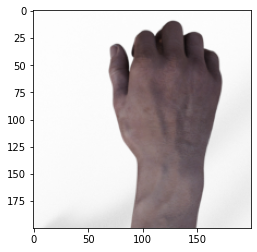

In [8]:


#------------------------ LIBRARIES -----------------------------------------------------------------
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 
import pandas as pd 
import os
from keras.models import load_model
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import random

#----------------------- DATA SORTING -----------------------------------------------------------------

rock_data = os.listdir(r"C:/deeplearning/Rock-Paper-Scissors/train/rock/")
paper_data =  os.listdir(r"C:/deeplearning/Rock-Paper-Scissors/train/paper/")
scissors_data = os.listdir(r"C:/deeplearning/Rock-Paper-Scissors/train/scissors/")

img_size = 200

class_names = ["Rock", "Paper", "Scissors"]

data = []

labels = []

for img in rock_data:   
    try:
        img_read = plt.imread(r"C:/deeplearning/Rock-Paper-Scissors/train/rock/" + img)
        img_resize = cv2.resize(img_read, (img_size, img_size))
        img_array = np.array(img_resize)
        
        if img_array.shape == (img_size, img_size, 4):
            data.append(img_array)
            labels.append(0)
    except:
        None
        
        
for img in paper_data:
    try:
        img_read = plt.imread(r"C:/deeplearning/Rock-Paper-Scissors/train/paper/" + img)
        img_resize = cv2.resize(img_read, (img_size, img_size))
        img_array = np.array(img_resize)
    
        if img_array.shape == (img_size, img_size, 4):
            data.append(img_array)
            labels.append(1)
    except:
        None

for img in scissors_data:
    try:
        img_read = plt.imread(r"C:/deeplearning/Rock-Paper-Scissors/train/scissors/" + img)
        img_resize = cv2.resize(img_read, (img_size, img_size))
        img_array = np.array(img_resize)
    
        if img_array.shape == (img_size, img_size, 4):
            data.append(img_array)
            labels.append(2)
    except:
         None
        

image_data = np.array(data).reshape(-1, img_size, img_size, 4) / 255.0
labels = np.array(labels)


index = np.arange(image_data.shape[0])
np.random.shuffle(index)
image_data = image_data[index]




training_images, testing_images, training_labels, testing_labels = train_test_split(image_data, labels, test_size = 0.20)



#---------------------------- DEFINING THE MODEL ---------------------------------------------------------------------------------------------------
"""
model = tf.keras.models.Sequential([
    
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (img_size, img_size, 4)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.10),
                                    

                                    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (img_size, img_size, 4)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.10),
                                    

                                    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (img_size, img_size, 4)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.10),
                                    

                                    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu", input_shape = (img_size, img_size, 4)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.10),
    
                                    
                                    
                                    tf.keras.layers.Flatten(),
    
                                    
                                    tf.keras.layers.Dense(512, activation = "relu"),                       
                                    tf.keras.layers.Dense(len(class_names), activation = "softmax")
                                    ])


#---------------------------------- TRAINING THE MODEL --------------------------------------------------------------------------

epochs = 20
batch_size = 64


model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(training_images, training_labels, batch_size = batch_size,
          epochs = epochs, validation_data = (testing_images, testing_labels),
          verbose = 1, steps_per_epoch = training_images.shape[0] // batch_size)

#------------------------------ SAVING & LOADING THE MODEL ---------------------------------------------------------------------------------------------------

model.save("rock_paper_scissors.tf")
"""
model = load_model("rock_paper_scissors.tf")

#----------------------------------PREDICTING THE VALUES------------------------------------------------------------------------------------

path = (r"C:\deeplearning\Rock-Paper-Scissors\validation\rock4.png")

im_read = plt.imread(path)
im_resize = cv2.resize(im_read, (img_size, img_size))
im_array = np.array(im_resize)

plt.imshow(im_array)

im_array = np.array(im_resize).reshape(-1, img_size, img_size, 4) / 255.0

prediction = (class_names[np.argmax(model.predict(im_array))])


#--------------A QUICK GAME MECHANIC (BONUS)----------------------------------------------------------------------------------------------------------------------



if prediction == "Rock":
    
    paper_path = (r"C:\deeplearning\Rock-Paper-Scissors\validation\paper2.png")
    image_paper = plt.imread(paper_path)
    resize_paper = cv2.resize(image_paper, (img_size, img_size))
    paper_array = np.array(resize_paper)
    plt.imshow(paper_array)
    
if prediction == "Paper":
    
    scissors_path = (r"C:\deeplearning\Rock-Paper-Scissors\validation\scissors3.png")
    image_scissors = plt.imread(scissors_path)
    resize_scissors = cv2.resize(image_scissors, (img_size, img_size))
    scissors_array = np.array(resize_scissors)
    plt.imshow(scissors_array)
    
else:
    rock_path = (r"C:\deeplearning\Rock-Paper-Scissors\validation\rock3.png")
    image_rock = plt.imread(rock_path)
    resize_rock = cv2.resize(image_rock, (img_size, img_size))
    rock_array = np.array(resize_rock)
    plt.imshow(rock_array)
    
    
    
    









